In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['order-20161115', 'gps-20161115', 'gps-20161115-with-zonelables']


In [2]:

gps = pd.read_csv('../input/gps-20161115/gps_20161115',names=['vehicle_id', 'order_id', 'universal_time', 'longitude', 'latitude'],)


In [17]:
#to show 10 rows
gps.tail(10)

,vehicle_id,order_id,universal_time,longitude,latitude,datetime,hour
28905992,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203057,104.05066,30.72638,2016-11-15 17:44:17,17
28905993,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203063,104.05006,30.72637,2016-11-15 17:44:23,17
28905994,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203066,104.04976,30.72637,2016-11-15 17:44:26,17
28905995,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203069,104.04947,30.72636,2016-11-15 17:44:29,17
28905996,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203072,104.04918,30.72639,2016-11-15 17:44:32,17
28905997,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203075,104.04887,30.72644,2016-11-15 17:44:35,17
28905998,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203078,104.04855,30.72652,2016-11-15 17:44:38,17
28905999,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203081,104.04826,30.72668,2016-11-15 17:44:41,17
28906000,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203084,104.04803,30.72693,2016-11-15 17:44:44,17
28906001,55133a5a3dc006090342e4d2dfa7915f,5b07bad664f5958ad4f538ce8842b983,1479203087,104.04777,30.72729,2016-11-15 17:44:47,17


In [9]:
#to get datetime
from datetime import datetime
import pytz
gps['datetime'] =gps.universal_time.apply(lambda x: datetime.fromtimestamp(x,pytz.timezone('Asia/Shanghai')).strftime('%Y-%m-%d %H:%M:%S'))



In [16]:
gps['hour']=gps.universal_time.apply(lambda x: datetime.fromtimestamp(x,pytz.timezone('Asia/Shanghai')).strftime('%H'))

In [18]:
gps['hour']=gps['hour'].astype('int')


<Figure size 1440x1440 with 0 Axes>

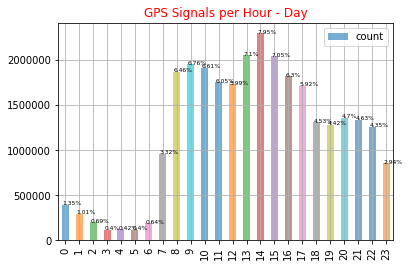

In [20]:
# to plot hourly gps signal for One day 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(1,1)
ax.set_title('GPS Signals per Hour - Day',fontsize=12,color='r')
s = gps.hour.value_counts().sort_index()
s.plot(kind='bar',grid=True,legend=True,label='count', alpha=0.6)
for i in ax.patches:
    ax.text(i.get_x() + .05,
            i.get_height() - 5,
            str(round((i.get_height() / sum(s) * 100), 2)) + '%',
            fontsize=6,
            color='black')



In [21]:
import folium
from folium.plugins import HeatMap

In [22]:
max_longi = gps.longitude.max()
min_longi = gps.longitude.min()
max_lati = gps.latitude.max()
min_lati = gps.latitude.min()

ptr = [max_lati,max_longi]
ptl = [max_lati,min_longi]
pdr = [min_lati,max_longi]
pdl = [min_lati,min_longi]

print("[ptr, ptl, pdl, pdr] in the map (lati,longi) :\n",[ptr, ptl, pdl, pdr])

    # Divide the zone into delta * delta pieces

    
    

[ptr, ptl, pdl, pdr] in the map (lati,longi) :
 [[30.72775, 104.12958], [30.72775, 104.04214], [30.65294, 104.04214], [30.65294, 104.12958]]


In [24]:
# plot contour with polygon
delta = 8
delta_longi = (max_longi - min_longi) /delta
delta_lati = (max_lati - min_lati) /delta
    
hmap = folium.Map(location=[gps['latitude'].mean(), gps['longitude'].mean()])
max_longi = gps.longitude.max()
min_longi = gps.longitude.min()
max_lati = gps.latitude.max()
min_lati = gps.latitude.min()

coordinates = [
    (min_lati, min_longi),
    (min_lati, max_longi),
    (max_lati, max_longi),
    (max_lati, min_longi),
    (min_lati, min_longi)
]
folium.PolyLine(coordinates, color='#FF0000', weight=5).add_to(hmap)

for i in range(1,delta):
    folium.PolyLine([(min_lati+i*delta_lati, min_longi),(min_lati + i*delta_lati, max_longi)], color='#FF0000', weight=2).add_to(hmap)
    folium.PolyLine([(min_lati, min_longi + i*delta_longi),(max_lati, min_longi + i*delta_longi)], color='#FF0000', weight=2).add_to(hmap)


gps_mtx = gps.sample(10000)
heat_data = []

for hour in range(24):
    gps_data = gps_mtx[(gps_mtx.hour == hour)][["latitude","longitude","hour"]].values.tolist()
    heat_data.append(gps_data)

from folium.plugins import HeatMapWithTime
HeatMapWithTime(data = heat_data,radius=5).add_to(hmap)
hmap

# Division zones:
# weekend or work day
# peak time: 8-10  and 17-19
# pdl base : 

In [ ]:
import pandas as pd 
import numpy as np
import os
import random
from datetime import datetime
def labelize_gps(gps):
    
    def interval_idx(ds, intervals):
        for idx, interval in enumerate(intervals):
            if ds in interval:
                return idx
        return -1

    start_time = datetime.now()
    # filename = "gps_20161115_subset_500000"
    
    # gps = pd.read_csv("./gps_20161115",
    #                    names = ['vehicle_id', 'order_id', 'universal_time', 'longitude', 'latitude'],nrows = 100000)
    

    gps['mounth'] = gps.universal_time.apply(lambda x: int(datetime.utcfromtimestamp(x).strftime("%m")))
    gps['day'] = gps.universal_time.apply(lambda x: int(datetime.utcfromtimestamp(x).strftime("%d")))
    gps['hour'] = gps.universal_time.apply(lambda x: int(datetime.utcfromtimestamp(x).strftime("%H")))
    gps['minute'] = gps.universal_time.apply(lambda x: int(datetime.utcfromtimestamp(x).strftime("%M")))
    gps['second'] = gps.universal_time.apply(lambda x: int(datetime.utcfromtimestamp(x).strftime("%S")))
    gps.drop(columns=["universal_time"])

    max_longi = gps.longitude.max()
    min_longi = gps.longitude.min()
    max_lati = gps.latitude.max()
    min_lati = gps.latitude.min()

    ptr = [max_lati,max_longi]
    ptl = [max_lati,min_longi]
    pdr = [min_lati,max_longi]
    pdl = [min_lati,min_longi]

    print("[ptr, ptl, pdl, pdr] in the map (lati,longi) :\n",[ptr, ptl, pdl, pdr])

    # Divide the zone into delta * delta pieces
    delta = 10

    lati_intervals = pd.interval_range(start = min_lati, end = max_lati, periods = delta)
    longi_intervals = pd.interval_range(start = min_longi, end = max_longi, periods = delta)

    gps['lati_idx'] = gps.latitude.map(lambda x: interval_idx(x,lati_intervals))
    gps['longi_idx'] = gps.longitude.map(lambda x: interval_idx(x,longi_intervals))

   
    print("process gps-11-15 : ",datetime.now() - start_time)
    
    return gps

In [ ]:
gps = labelize_gps(gps)

In [ ]:
gps.head(5)

In [26]:
trip = gps.groupby(['vehicle_id','order_id']).size().reset_index(name='counts')

In [27]:
trip

,vehicle_id,order_id,counts
0,0001142a239c44d2e3a891638c910e47,046d0c221d281dd43ab9c84bccca77e6,125
1,0001142a239c44d2e3a891638c910e47,245c616181c6e73c4dd88e944a5712a6,197
2,0001142a239c44d2e3a891638c910e47,5116a67f03b8fdb03af15cc96c6a8f29,332
3,0001142a239c44d2e3a891638c910e47,556d0ae5a0ad5826f1d37c7f670231fd,184
4,0001142a239c44d2e3a891638c910e47,599b5919ead420b8f6e7f61be59155c3,210
5,0001142a239c44d2e3a891638c910e47,a4a4f14e23c84e6cd4f915b8a93d0bcd,96
6,0001142a239c44d2e3a891638c910e47,d2f6dc3e966fffa8ecc0f24d2a3fb579,274
7,0001142a239c44d2e3a891638c910e47,e393eb7f9c103fe1a0693555f72bd3aa,9
8,0001142a239c44d2e3a891638c910e47,e958682c31bb6101faf7074857c1cecb,58
9,00028fed74fdc42a34a378ba0cf046f0,6194d38e1fa92260f1537005d62646db,12


In [28]:
hmap = folium.Map(location=[gps['latitude'].mean(), gps['longitude'].mean()])
data = gps[(gps.vehicle_id == trip.vehicle_id[0]) & (gps.order_id == trip.order_id[0])][['latitude','longitude']].values.tolist()
folium.PolyLine(data, weight=10).add_to(hmap)
folium.Marker(location=data[0]).add_to(hmap)
folium.Marker(location=data[-1]).add_to(hmap)
hmap 
#hmap.add_child(HeatMap(data = data, radius=5))

In [ ]:
# plot the number of gps signal hourly for one zone
fig,ax=plt.subplots(1,1)
ax.set_title('GPS Signals hourly for each zone - Day',fontsize=12,color='r')
plt.figure(figsize=(10,4))
s = gps[gps.zone==[1,1]]['hour'].value_counts()
s.plot(kind='bar',grid=True,legend=True,label='count', alpha=0.6)

In [ ]:
# plot the number of order hourly for one zone
order_hour = gps[gps.zone==[1,1]].groupby(['order_id','hour']).size().reset_index(name='counts')
order_hour
fig,ax=plt.subplots(1,1)
ax.set_title('orders hourly for each zone - Day',fontsize=12,color='r')
plt.figure(figsize=(10,4))
s2 = order_hour['hour'].value_counts().sort_index()
s2.plot(kind='bar',grid=True,legend=True,label='count', alpha=0.6)